In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [4]:
path=r'C:\Users\Anurag\OneDrive\Desktop\dtset\opencv\myData'
label_csv=r'C:\Users\Anurag\OneDrive\Desktop\dtset\opencv\labels.csv'
batch_size_val=32 #no of image process togther
steps_per_epoch_val=2000 
epochs_val=10
imageDimesions=(32,32,3) ## iamge dim 32 height,32 width,3 channels
testRatio=0.2 ## 20% of test data 80% tran data
validationRatio=0.2

In [6]:
count=0
img_list,class_no_list=[],[]
mylist=os.listdir(path)
print("total class found: {}".format(len(mylist)))
no_of_classes=len(mylist)
print("Loading Images......")
for i in range(0,no_of_classes):
    mypic_ls=os.listdir(path+'/'+str(count))
    for j in mypic_ls:
        cur_img=cv2.imread(path+'/'+str(count)+'/'+j)
        img_list.append(cur_img)
        class_no_list.append(count)
    print(count,end=" ")
    count+=1
print(" ")
img_list=np.array(img_list)
class_no_list=np.array(class_no_list)
print("Image Loading Successfully.....")

total class found: 43
Loading Images......
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  
Image Loading Successfully.....


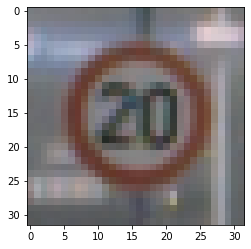

In [7]:
plt.imshow(img_list[1])  ### show 1st img

In [8]:
len(img_list)

34799

In [9]:
len(class_no_list)

34799

In [10]:
###now plotting sub plots 5*5
test=pd.read_csv(label_csv)
test

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


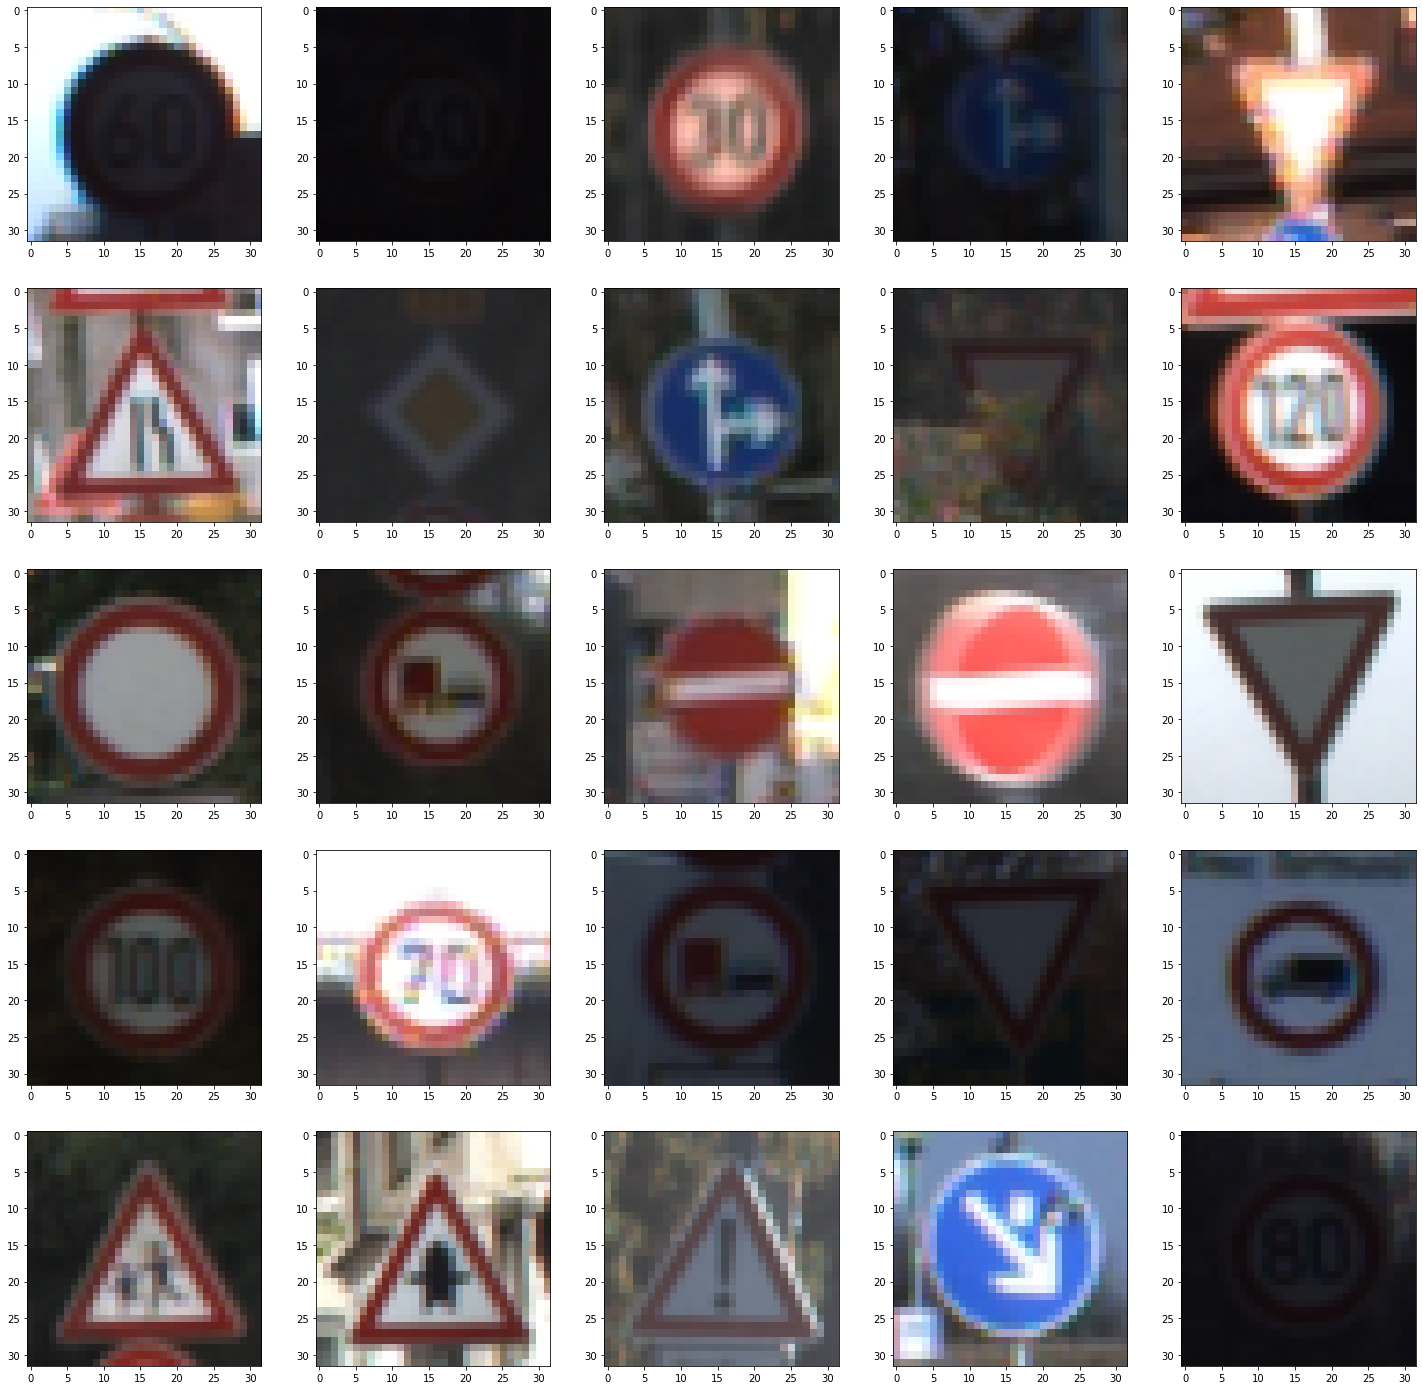

In [11]:
plt.figure(figsize=(25,25))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(random.choice(img_list))
   
    

In [12]:
x_train,x_test,y_train,y_test=train_test_split(img_list,class_no_list,test_size=testRatio)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=validationRatio)

In [13]:
print(x_train.shape,y_train.shape)

(22271, 32, 32, 3) (22271,)


In [14]:
print(x_test.shape,y_test.shape)

(6960, 32, 32, 3) (6960,)


In [15]:
print(x_val.shape,y_val.shape)

(5568, 32, 32, 3) (5568,)


In [16]:
##cheak the image shape using train,tset,split if its not in same shape it raise a assertion error
assert(x_train.shape[0]==y_train.shape[0])
assert(x_test.shape[0]==y_test.shape[0])
assert(x_val.shape[0]==y_val.shape[0])

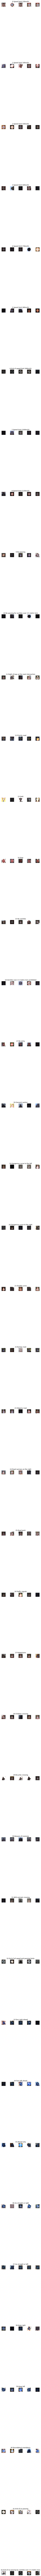

In [17]:
num_of_samples=[]
cols=5
num_classes=no_of_classes
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in test.iterrows():
        x_selected = x_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))

[115, 1264, 1318, 803, 1132, 1051, 221, 827, 792, 836, 1126, 749, 1161, 1240, 451, 368, 234, 637, 702, 118, 202, 171, 213, 274, 159, 853, 333, 132, 307, 164, 244, 442, 133, 380, 246, 718, 206, 117, 1207, 170, 188, 136, 131]


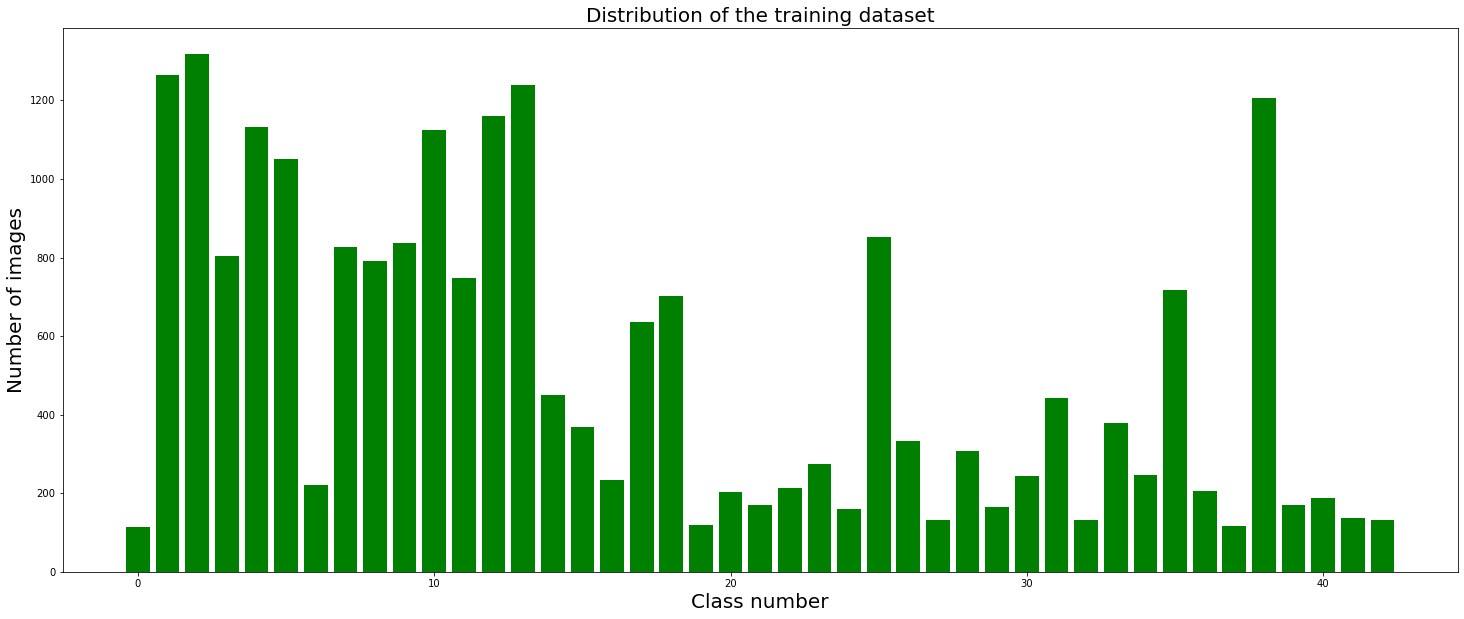

In [18]:
print(num_of_samples)
plt.figure(figsize=(25,10))
plt.bar(range(0,num_classes),num_of_samples,color='g')
plt.title("Distribution of the training dataset",fontsize=20)
plt.xlabel("Class number",fontsize=20)
plt.ylabel("Number of images",fontsize=20)
plt.show()

In [19]:
def greyscale(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img=cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img=greyscale(img)
    img=equalize(img)
    img=img/225.0
    return img

In [20]:
x_train=np.array(list(map(preprocessing,x_train)))
x_val=np.array(list(map(preprocessing,x_val)))
x_test=np.array(list(map(preprocessing,x_test)))
cv2.imshow("GrayScale Images",x_train[random.randint(0,len(x_train)-1)])

# # add depth 1


In [21]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_val=x_val.reshape(x_val.shape[0],x_val.shape[1],x_val.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [22]:
datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)
datagen.fit(x_train)

In [23]:
batches=datagen.flow(x_train,y_train,batch_size=20)  
x_batch,y_batch =next(batches)
print(x_batch.shape,y_batch.shape)

(20, 32, 32, 1) (20,)


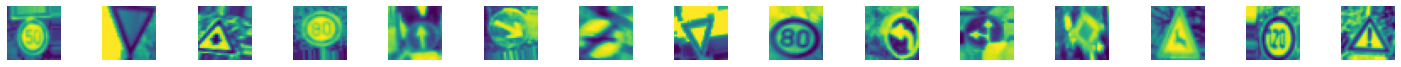

In [24]:
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
for i in range(15):
    axs[i].imshow(x_batch[i].reshape(imageDimesions[0],imageDimesions[1]))
    axs[i].axis('off')
plt.show()

y_train=to_categorical(y_train,no_of_classes)
y_val=to_categorical(y_val,no_of_classes)
y_test=to_categorical(y_test,no_of_classes)

In [25]:
from keras.layers import MaxPool2D

In [26]:
def CNN():
    no_of_filter=60
    size_of_filter1=(5,5)
    size_of_filter2=(3,3)
    size_of_pool=(2,2)
    no_of_nodes=500
    model=Sequential()
    model.add((Conv2D(no_of_filter,size_of_filter1,input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  
    model.add((Conv2D(no_of_filter,size_of_filter1,activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    
    model.add((Conv2D(no_of_filter//2,size_of_filter2,activation='relu')))
    model.add((Conv2D(no_of_filter//2,size_of_filter2,activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(no_of_nodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(no_of_classes,activation='softmax'))
    
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [27]:
model=CNN()
print(model.summary())
my_callbacks=[
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

E:\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [28]:
ru=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size_val),epochs=30,validation_data=(x_val,y_val),shuffle=1)

C:\Users\Anurag\AppData\Local\Temp/ipykernel_13732/4236907188.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  ru=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size_val),epochs=30,validation_data=(x_val,y_val),shuffle=1)


Epoch 1/30
696/696 [==============================] - 259s 369ms/step - loss: 2.4568 - accuracy: 0.3143 - val_loss: 0.7992 - val_accuracy: 0.7554
Epoch 2/30
696/696 [==============================] - 321s 461ms/step - loss: 1.2278 - accuracy: 0.6213 - val_loss: 0.3326 - val_accuracy: 0.9019
Epoch 3/30
696/696 [==============================] - 258s 371ms/step - loss: 0.8404 - accuracy: 0.7375 - val_loss: 0.1831 - val_accuracy: 0.9501
Epoch 4/30
696/696 [==============================] - 156s 225ms/step - loss: 0.6434 - accuracy: 0.7993 - val_loss: 0.1785 - val_accuracy: 0.9549
Epoch 5/30
696/696 [==============================] - 147s 211ms/step - loss: 0.5567 - accuracy: 0.8227 - val_loss: 0.1249 - val_accuracy: 0.9695
Epoch 6/30
696/696 [==============================] - 133s 190ms/step - loss: 0.4741 - accuracy: 0.8509 - val_loss: 0.0854 - val_accuracy: 0.9732
Epoch 7/30
696/696 [==============================] - 128s 183ms/step - loss: 0.4267 - accuracy: 0.8656 - val_loss: 0.0795 -

Text(0.5, 0, 'epoch')

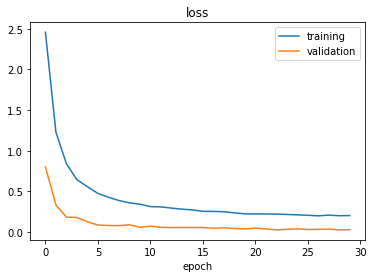

In [29]:
plt.figure(1)
plt.plot(ru.history['loss'])
plt.plot(ru.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

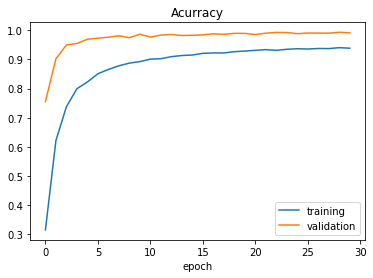

In [30]:
plt.figure(2)
plt.plot(ru.history['accuracy'])
plt.plot(ru.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')

In [31]:
score =model.evaluate(x_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

Test Score: 0.022059958428144455
Test Accuracy: 0.9928160905838013


In [32]:
model.save("my_model")
model.save_weights("weight_file.h5")

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [33]:
!!Done

["'Done' is not recognized as an internal or external command,",
 'operable program or batch file.']